The main purpose of this analysis is to see if there is any correlation between fluoride and overall better dental health outcomes. What really drives me is that I struggled with my dental health growing up, even though I made a priority out of brushing, flossing, and going to check-ups every six months. What I came to realize is that I did not have fluoridated water growing up; I had well water (which has little to no fluoride). My hope is that I find some sort of correlation between having fluoridated water and positive dental health outcomes. However, if no correlation is found, it could point to other factors influencing dental health that go beyond just fluoride, such as genetics, diet, or access to dental care. In that case, it would be valuable to explore those other aspects in greater detail.

In [2]:
import pandas as pd
import json
import requests
import base64
import matplotlib.pyplot as plt
import six
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns


In [3]:

PaData = pd.read_csv(r"C:\Users\conne\Downloads\ExportCSV.csv")

PaData = PaData.drop(columns=[
    'LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
    'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
    'High_Confidence_Limit', 'Stratification', 'StratificationType', 
    'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
    'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'
])


PaData_filtered = PaData[PaData['Response'] == 'Yes'].drop(columns=['Response'])


PaData_filtered = PaData_filtered.rename(columns={
    'LocationDesc': 'State',
    'Data_Value': 'Tooth Loss %'
})


PaData_filtered.head()
Pafloride = pd.read_csv(r'C:\Users\conne\Downloads\pafloride.csv')

Pafloride = Pafloride.drop(columns=[
    'LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
    'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
    'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
    'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'
])
Pafloride_filtered = Pafloride[Pafloride['Type'] == 'Fluoridated'].drop(columns=['Type'])
Pafloride_filtered = Pafloride_filtered.rename(columns={
    'LocationDesc': 'State',
    'Data_Value': 'Fluoridation %'
})

Pafloride_filtered.head()
PAmerged_data = pd.merge(
    PaData_filtered[['Year', 'State', 'Tooth Loss %']], 
    Pafloride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner'  
)
PAmerged_data['Dental_Health_Rank'] = 27


PAmerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Pennsylvania,36.1,60.0,27


The data on tooth loss and fluoridation percentages is sourced from the CDC website: https://nccd.cdc.gov/oralhealthdata/rdPage.aspx?rdReport=DOH_DATA.ExploreByLocation&rdProcessAction=&SaveFileGenerated=1&irbLocationType=State&islLocation=59&rdICL-iclTopic=ADT&iclTopic_rdExpandedCollapsedHistory=&iclTopic=ADT&islYear=2020&hidLocationType=State&hidLocation=59&hidTopic=ADT&hidTopicName=&hidYear=2020&irbShowFootnotes=Show&iclIndicators_rdExpandedCollapsedHistory=&iclIndicators=ADT1_1%2cADT1_3%2cADT1_4&hidPreviouslySelectedIndicators=&DashboardColumnCount=2&rdShowElementHistory=&rdScrollX=0&rdScrollY=0&rdRnd=26203. This comprehensive resource provides state-level data, which includes key metrics on dental health, such as tooth loss and fluoridation percentages.

The data for oral health rankings by state is derived from a WalletHub article: https://wallethub.com/edu/states-with-best-worst-dental-health/31498. The article provides an in-depth look at various indicators related to oral health, such as dental visits, costs, and oral hygiene habits, offering a detailed ranking of states based on these factors. Since the most recent CDC data available is from 2020, the WalletHub oral health ranking article is also from 2020 to ensure consistency in the temporal context of the data.

The data is organized into two CSV files. The first contains the percentage of adults aged 65 and older who have lost six or more teeth due to decay or gum disease by state, while the second provides data on water fluoridation levels for each state, indicating whether the water is fluoridated. The cleaning process began by removing irrelevant columns from both datasets to focus on key variables—'Tooth Loss %' and 'Fluoridation %' and renaming columns for clarity. Rows in the first dataset were filtered to include only 'Yes' responses, representing individuals who met the tooth loss condition, and in the second dataset, the percentage represents the amount of water that is fluoridated in the state. These cleaned datasets were merged on State and Year to enable comparative analysis of tooth loss percentages and fluoridation levels. Additionally, a Dental_Health_Rank column was manually created and assigned a value for each state's ranking, as the ranking data was not included in any file. The ranking comes from Wallethub.

This will be done to all states to organize the data.

In [4]:
TexasData = pd.read_csv(r'C:\Users\conne\Downloads\Texasdata.csv')
TexasData = TexasData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                    'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                    'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                    'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                    'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
TexasData_filtered = TexasData[TexasData['Response'] == 'Yes']
TexasData_filtered = TexasData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


TexasFluoride = pd.read_csv(r"C:\Users\conne\Downloads\TexasFluoride.csv")
TexasFluoride = TexasFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                           'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                           'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                           'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
TexasFluoride_filtered = TexasFluoride[TexasFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
TexasFluoride_filtered = TexasFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

TexasFluoride_filtered.head()
TexasData_filtered.head()
Texasmerged_data = pd.merge(
    TexasData_filtered[['Year', 'State', 'Tooth Loss %']], 
    TexasFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Texasmerged_data['Dental_Health_Rank'] = 46


Texasmerged_data.head()

,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Texas,31.5,71.0,46


In [5]:
IllinoisData = pd.read_csv(r'C:\Users\conne\Downloads\Illinoisdata.csv')
IllinoisData = IllinoisData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
IllinoisData_filtered = IllinoisData[IllinoisData['Response'] == 'Yes']
IllinoisData_filtered = IllinoisData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


IllinoisFluoride = pd.read_csv(r"C:\Users\conne\Downloads\IllinoisFluoride.csv")
IllinoisFluoride = IllinoisFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
IllinoisFluoride_filtered = IllinoisFluoride[IllinoisFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
IllinoisFluoride_filtered = IllinoisFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

IllinoisFluoride_filtered.head()
IllinoisData_filtered.head()

Illinoismerged_data = pd.merge(
    IllinoisData_filtered[['Year', 'State', 'Tooth Loss %']], 
    IllinoisFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Illinoismerged_data['Dental_Health_Rank'] = 1


Illinoismerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Illinois,30.7,98.4,1


In [6]:
MississippiData = pd.read_csv(r'C:\Users\conne\Downloads\Missdata.csv')
MississippiData = MississippiData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                  'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                  'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                  'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                  'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
MississippiData_filtered = MississippiData[MississippiData['Response'] == 'Yes']
MississippiData_filtered = MississippiData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


MississippiFluoride = pd.read_csv(r"C:\Users\conne\Downloads\MissFluoride.csv")
MississippiFluoride = MississippiFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                           'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                           'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                           'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
MississippiFluoride_filtered = MississippiFluoride[MississippiFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
MississippiFluoride_filtered = MississippiFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

Mississippimerged_data = pd.merge(
    MississippiData_filtered[['Year', 'State', 'Tooth Loss %']], 
    MississippiFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Mississippimerged_data['Dental_Health_Rank'] = 49


Mississippimerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Mississippi,44.6,61.1,49


In [7]:
NewJerseyData = pd.read_csv(r'C:\Users\conne\Downloads\NewJerseydata.csv')
NewJerseyData = NewJerseyData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
NewJerseyData_filtered = NewJerseyData[NewJerseyData['Response'] == 'Yes']
NewJerseyData_filtered = NewJerseyData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


NewJerseyFluoride = pd.read_csv(r"C:\Users\conne\Downloads\NewJerseyFluoride.csv")
NewJerseyFluoride = NewJerseyFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
NewJerseyFluoride_filtered = NewJerseyFluoride[NewJerseyFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
NewJerseyFluoride_filtered = NewJerseyFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

NewJerseyFluoride_filtered.head()
NewJerseyData_filtered.head()

NewJerseymerged_data = pd.merge(
    NewJerseyData_filtered[['Year', 'State', 'Tooth Loss %']], 
    NewJerseyFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
NewJerseymerged_data['Dental_Health_Rank'] = 3

NewJerseymerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,New Jersey,29.7,16.1,3


In [8]:
ColoradoData = pd.read_csv(r'C:\Users\conne\Downloads\Coloradodata.csv')
ColoradoData = ColoradoData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
ColoradoData_filtered = ColoradoData[ColoradoData['Response'] == 'Yes']
ColoradoData_filtered = ColoradoData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


ColoradoFluoride = pd.read_csv(r"C:\Users\conne\Downloads\ColoradoFluoride.csv")
ColoradoFluoride = ColoradoFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
ColoradoFluoride_filtered = ColoradoFluoride[ColoradoFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
ColoradoFluoride_filtered = ColoradoFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

ColoradoFluoride_filtered.head()
ColoradoData_filtered.head()

Coloradomerged_data = pd.merge(
    ColoradoData_filtered[['Year', 'State', 'Tooth Loss %']], 
    ColoradoFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Coloradomerged_data['Dental_Health_Rank'] = 38


Coloradomerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Colorado,24.1,75.2,38


In [9]:
NebraskaData = pd.read_csv(r'C:\Users\conne\Downloads\Nebraskadata.csv')
NebraskaData = NebraskaData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
NebraskaData_filtered = NebraskaData[NebraskaData['Response'] == 'Yes']
NebraskaData_filtered = NebraskaData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


NebraskaFluoride = pd.read_csv(r"C:\Users\conne\Downloads\NebraskaFluoride.csv")
NebraskaFluoride = NebraskaFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
NebraskaFluoride_filtered = NebraskaFluoride[NebraskaFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
NebraskaFluoride_filtered = NebraskaFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

NebraskaFluoride_filtered.head()
NebraskaData_filtered.head()

Nebraskamerged_data = pd.merge(
    NebraskaData_filtered[['Year', 'State', 'Tooth Loss %']], 
    NebraskaFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Nebraskamerged_data['Dental_Health_Rank'] = 23


Nebraskamerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Nebraska,24.7,73.8,23


In [10]:
VermontData = pd.read_csv(r'C:\Users\conne\Downloads\Vermontdata.csv')
VermontData = VermontData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
VermontData_filtered = VermontData[VermontData['Response'] == 'Yes']
VermontData_filtered = VermontData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


VermontFluoride = pd.read_csv(r"C:\Users\conne\Downloads\VermontFluoride.csv")
VermontFluoride = VermontFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
VermontFluoride_filtered = VermontFluoride[VermontFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
VermontFluoride_filtered = VermontFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

VermontFluoride_filtered.head()
VermontData_filtered.head()

Vermontmerged_data = pd.merge(
    VermontData_filtered[['Year', 'State', 'Tooth Loss %']], 
    VermontFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Vermontmerged_data['Dental_Health_Rank'] = 35


Vermontmerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Vermont,33.0,56.3,35


In [11]:
NewYorkData = pd.read_csv(r'C:\Users\conne\Downloads\NewYorkdata.csv')
NewYorkData = NewYorkData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
NewYorkData_filtered = NewYorkData[NewYorkData['Response'] == 'Yes']
NewYorkData_filtered = NewYorkData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


NewYorkFluoride = pd.read_csv(r"C:\Users\conne\Downloads\NewYorkFluoride.csv")
NewYorkFluoride = NewYorkFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
NewYorkFluoride_filtered = NewYorkFluoride[NewYorkFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
NewYorkFluoride_filtered = NewYorkFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

NewYorkFluoride_filtered.head()
NewYorkData_filtered.head()

NewYorkmerged_data = pd.merge(
    NewYorkData_filtered[['Year', 'State', 'Tooth Loss %']], 
    NewYorkFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
NewYorkmerged_data['Dental_Health_Rank'] = 29


NewYorkmerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,New York,34.4,71.5,29


In [12]:
WashingtonData = pd.read_csv(r'C:\Users\conne\Downloads\Washingtondata.csv')
WashingtonData = WashingtonData.drop(columns=['LocationAbbr', 'Datasource', 'Parent1', 'Data_Value_Type', 
                                          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Low_Confidence_Limit', 
                                          'High_Confidence_Limit', 'Stratification', 'StratificationType', 
                                          'Sample_Size', 'IndicatorID', 'DatasourceText', 'DatasourceURL', 
                                          'Global_Footnote', 'Suggested_Citation', 'Data_Value_Footnote'])
WashingtonData_filtered = WashingtonData[WashingtonData['Response'] == 'Yes']
WashingtonData_filtered = WashingtonData_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Tooth Loss %'})


WashingtonFluoride = pd.read_csv(r"C:\Users\conne\Downloads\WashingtonFluoride.csv")
WashingtonFluoride = WashingtonFluoride.drop(columns=['LocationAbbr', 'StateAbbr', 'DataSource', 'Parent1', 'IndicatorId', 
                                                 'TypeOrder', 'Data_Value_Unit', 'Data_Value_Type', 'LocationOrder', 
                                                 'DatasourceText', 'DatasourceURL', 'Global_Footnote', 'Suggested_Citation', 
                                                 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TypeID'])
WashingtonFluoride_filtered = WashingtonFluoride[WashingtonFluoride['Type'] == 'Fluoridated'].drop(columns=['Type'])
WashingtonFluoride_filtered = WashingtonFluoride_filtered.rename(columns={'LocationDesc': 'State', 'Data_Value': 'Fluoridation %'})

WashingtonFluoride_filtered.head()
WashingtonData_filtered.head()

Washingtonmerged_data = pd.merge(
    WashingtonData_filtered[['Year', 'State', 'Tooth Loss %']], 
    WashingtonFluoride_filtered[['Year', 'State', 'Fluoridation %']], 
    on=['Year', 'State'], 
    how='inner' 
)
Washingtonmerged_data['Dental_Health_Rank'] = 10


Washingtonmerged_data.head()


,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Washington,24.9,65.1,10


In [13]:
combined_data = pd.concat([Illinoismerged_data,PAmerged_data,Mississippimerged_data,Texasmerged_data,NewJerseymerged_data,Coloradomerged_data,Nebraskamerged_data,
                          Washingtonmerged_data,NewYorkmerged_data,Vermontmerged_data], ignore_index=True)

combined_data.head(10)

,Year,State,Tooth Loss %,Fluoridation %,Dental_Health_Rank
0,2020.0,Illinois,30.7,98.4,1
1,2020.0,Pennsylvania,36.1,60.0,27
2,2020.0,Mississippi,44.6,61.1,49
3,2020.0,Texas,31.5,71.0,46
4,2020.0,New Jersey,29.7,16.1,3
5,2020.0,Colorado,24.1,75.2,38
6,2020.0,Nebraska,24.7,73.8,23
7,2020.0,Washington,24.9,65.1,10
8,2020.0,New York,34.4,71.5,29
9,2020.0,Vermont,33.0,56.3,35


Here is the merged data frame. It includes all the data that I will be using for the analysis. It was really cleaned up by removing, filtering, and renaming things to get it to this state. There are 10 total states I picked based on some ranked lower, higher, and in the middle of the state's dental health ranking. 

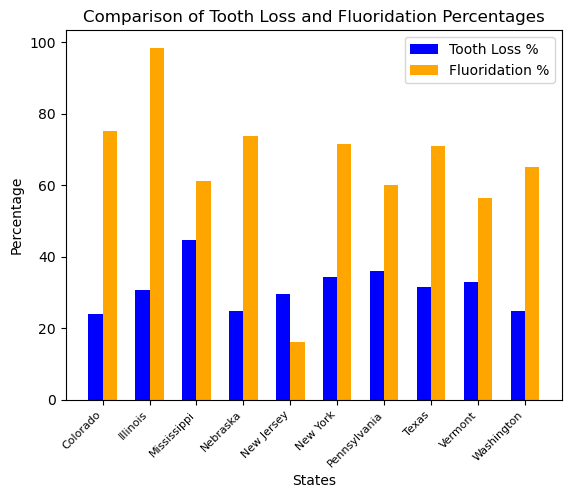

In [14]:


tooth_loss = combined_data.groupby('State')['Tooth Loss %'].mean()
fluoridation = combined_data.groupby('State')['Fluoridation %'].mean()

tooth_loss = tooth_loss.sort_index()
fluoridation = fluoridation.sort_index()

bar_width = 0.3
index = np.arange(len(tooth_loss)) 


plt.bar(index, tooth_loss, bar_width, label='Tooth Loss %', color='blue')
plt.bar(index + bar_width, fluoridation, bar_width, label='Fluoridation %', color='orange')

plt.xlabel('States')
plt.ylabel('Percentage')
plt.title('Comparison of Tooth Loss and Fluoridation Percentages')

plt.xticks(index + bar_width / 2, tooth_loss.index, rotation=45, ha='right', fontsize=8)  
# This just makes the state's names more readable and neat. Without it the state's names overlap.
#https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels  Heres where I learned it from.


plt.legend()

plt.show()


The chart suggests there may be some correlation between higher fluoridation percentages and lower tooth loss percentages, but the relationship doesn't appear to be very strong or consistent. Especially when you take into account a state like New Jersey

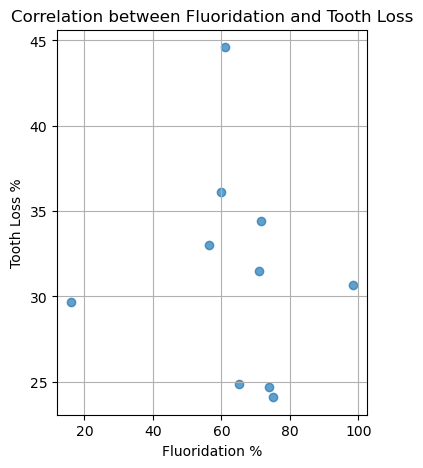

In [15]:
plt.figure(figsize=(4, 5))
plt.scatter(combined_data['Fluoridation %'], combined_data['Tooth Loss %'], alpha=0.7)
plt.title('Correlation between Fluoridation and Tooth Loss')
plt.xlabel('Fluoridation %')
plt.ylabel('Tooth Loss %')
plt.grid(True)
plt.show()


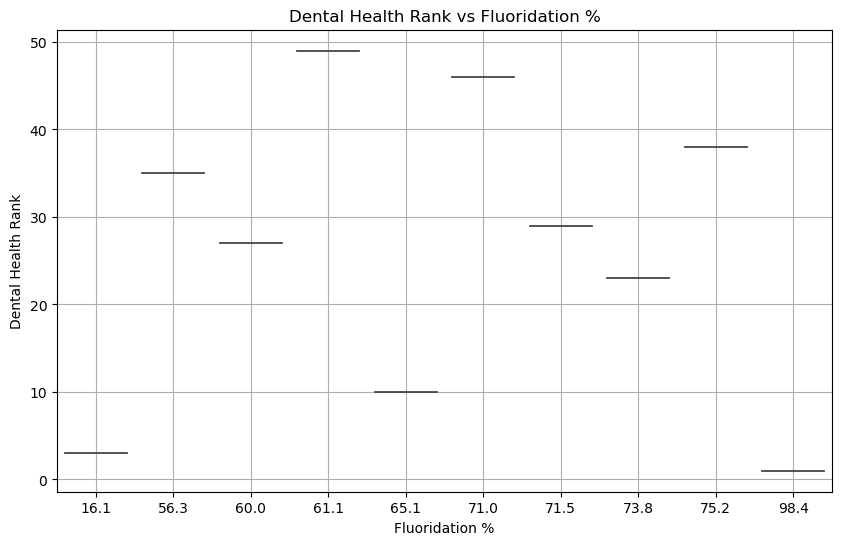

In [16]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Fluoridation %', y='Dental_Health_Rank', data=combined_data, inner='quart') # This is a cool plot called a violin plot, acts like a scatter plot
plt.title('Dental Health Rank vs Fluoridation %')
plt.xlabel('Fluoridation %')
plt.ylabel('Dental Health Rank')
plt.grid(True)
plt.show()
plt.show()

Here is another kind of scatter plot illustrating if there is any correlation between fluoridation % and the ranking of the state's oral health. I was hoping to see that the higher the fluoridation % was the lower the state's rank would be (1 = the best), but there doesn't seem to be any kind of trend. There is only one state that really fits that and that is Illinois, which is ranked number 1 out of all the states.

This analysis looks at how water fluoridation connects to dental health in U.S. states. While there appears to be some correlation between higher fluoridation percentages and improved dental health rankings, it is essential to consider the broader context of the data.

WalletHub ranks dental health by looking at more than just fluoridated water. They also consider things like regular dentist visits, dental care prices and the availability of dental professionals. So, states with less fluoridated water might still do well in dental health because of other health programs, awareness efforts, or economic factors. Maybe this is very important.

The fluoridation percentage reflects the proportion of the population with access to fluoridated water but does not account for factors such as how much individuals actually consume it or other regional habits and behaviors. To build on this analysis, additional data would be valuable, such as information on access to dental care, healthcare funding, and community demographics. Future work on my analysis could explore these variables to better understand the broader context and factors influencing dental health outcomes. If I were to continue this project, I would focus on integrating these additional datasets to provide a more comprehensive analysis.

There are limits to this study. The analysis acts as fluoridation mostly drives dental health, but things like income, diet and state health rules might matter as well. These findings are a starting point, but more in-depth research is needed to understand causes.

More research could look at how state money for dental health or differences in dental insurance affects dental health. Studying states with similar economies but different fluoridation rules might show fluoridation's true impact. Overall, this study shows that many factors shape dental health, not just fluoridation, and it suggests a need for different ways to improve it.

